In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


 ## Задание

В приложенном файле 3 датасета:

1) Данные треков - Richtracks (описание приложено)
2) Данные точек этих треков - IncomingTrackPoints (описание также приложено)
3) Наборы токен-платформа (iOS или Android)

Задание:

1) Некоторые параметры набора точек для трека имеют различную размерность в 
зависимости от платформы (iOS или Android) - какие это параметры?

2) Переведите все параметры в одинаковую размерность

3) В richtracks для каждого трека есть поле TrackOrigin, которое описывает кем была произведена поездка: владельцем смартфона или нет. Задание: постройте модель, предсказывающую на основании данных из входящих точек, была ли поездка пассажирской или нет.

In [2]:
inc_points = pd.read_csv("inc_points_2.csv")

In [3]:
rich_tracks = pd.read_csv("rich_tracks_2.csv")

In [4]:
os = pd.read_csv("os.csv")

In [5]:
inc_points.shape

(3791240, 12)

In [6]:
rich_tracks.shape

(4000, 64)

In [7]:
os.shape

(4416, 2)

In [8]:
inc_points.head()

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
0,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315732,0.829803,0.322861,-0.154434
1,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315733,0.716080,0.612228,-0.168091
2,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315734,0.913208,0.488998,0.308365
3,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315735,0.930328,0.396133,-0.145203
4,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315736,0.887436,0.647537,0.245926


In [63]:
inc_points.corr()

,IncomingTrackId,Speed,Latitude,Longitude,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
IncomingTrackId,1.000000,0.017130,-0.028739,0.032426,-0.012282,-0.053833,-0.046845,0.933136,0.034118,-0.019136,-0.059927
Speed,0.017130,1.000000,-0.023884,-0.001227,0.034605,0.092076,0.096790,-0.006424,0.025105,0.035769,0.021185
Latitude,-0.028739,-0.023884,1.000000,-0.835926,0.176165,0.040864,0.025882,0.046093,-0.025333,0.044515,0.013475
Longitude,0.032426,-0.001227,-0.835926,1.000000,-0.279864,-0.037801,-0.025496,-0.036498,0.005762,-0.052190,-0.037024
Height,-0.012282,0.034605,0.176165,-0.279864,1.000000,0.005819,0.008951,0.008245,0.037073,0.069585,0.082062
Acceleration,-0.053833,0.092076,0.040864,-0.037801,0.005819,1.000000,0.726273,-0.040345,0.123520,0.052594,0.023494
Deceleration,-0.046845,0.096790,0.025882,-0.025496,0.008951,0.726273,1.000000,-0.028277,0.130994,0.047056,0.071674
TickTimestamp,0.933136,-0.006424,0.046093,-0.036498,0.008245,-0.040345,-0.028277,1.000000,0.051828,0.015127,-0.014535
AccelerationXOriginal,0.034118,0.025105,-0.025333,0.005762,0.037073,0.123520,0.130994,0.051828,1.000000,0.010849,0.008252
AccelerationYOriginal,-0.019136,0.035769,0.044515,-0.052190,0.069585,0.052594,0.047056,0.015127,0.010849,1.000000,0.192397


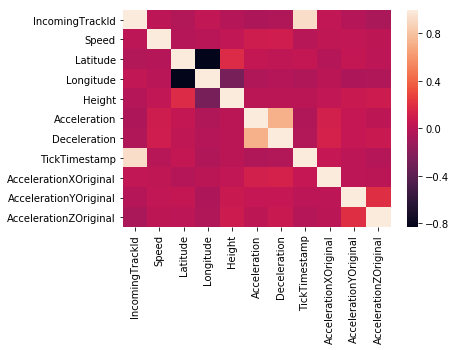

In [64]:
sns.heatmap(inc_points.corr())

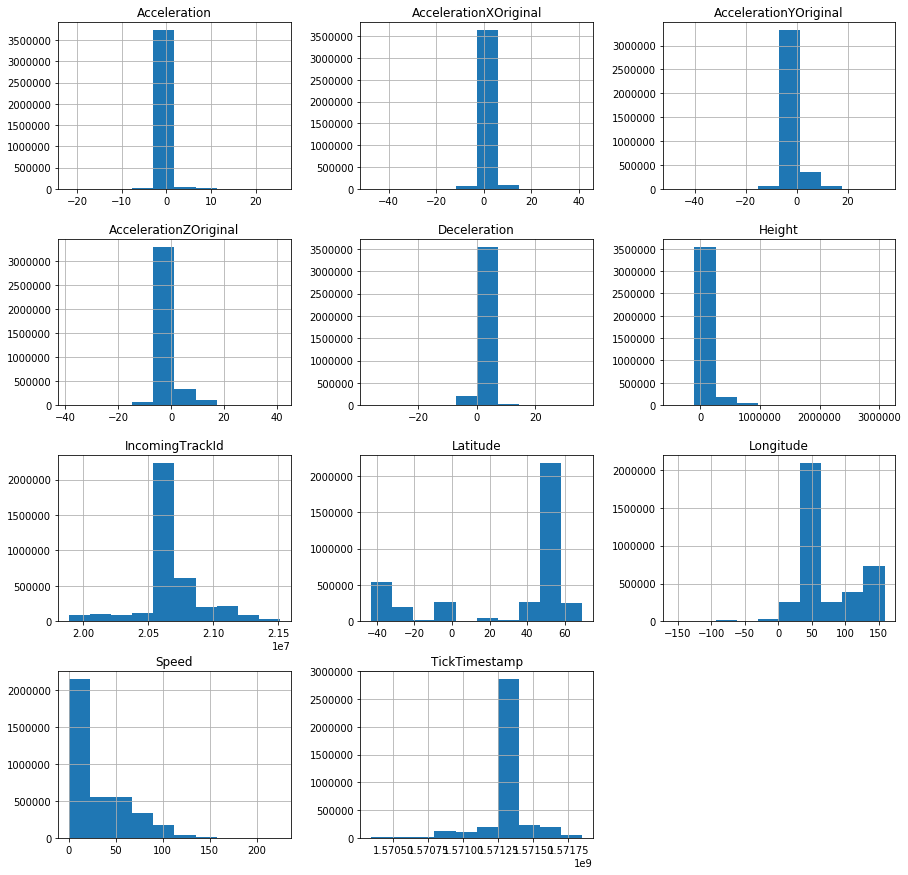

In [67]:
inc_points.hist(figsize=(15, 15));

In [68]:
inc_points['Speed']

0          0.000000e+00
1          0.000000e+00
2          0.000000e+00
3          0.000000e+00
4          0.000000e+00
5          0.000000e+00
6          0.000000e+00
7          0.000000e+00
8          0.000000e+00
9          0.000000e+00
10         0.000000e+00
11         0.000000e+00
12         0.000000e+00
13         0.000000e+00
14         0.000000e+00
15         0.000000e+00
16         0.000000e+00
17         1.548000e+00
18         1.548000e+00
19         7.200000e-01
20         1.008000e+00
21         3.132000e+00
22         0.000000e+00
23         0.000000e+00
24         0.000000e+00
25         0.000000e+00
26         0.000000e+00
27         0.000000e+00
28         0.000000e+00
29         0.000000e+00
               ...     
3791210    1.165138e-06
3791211    5.375836e-07
3791212    1.948016e-07
3791213    6.790004e-08
3791214    4.292933e-08
3791215    7.483407e-08
3791216    1.457109e-08
3791217    3.349272e-09
3791218    4.311255e-09
3791219    2.037904e-09
3791220    1.212

In [9]:
rich_tracks.head()

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,...,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
0,5148865,AB70A2A9-B45C-453D-B07C-C2D9E9D7442B,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702795,2019-10-17 15:35:34.0000000 +03:00,2019-10-17 15:46:05.0000000 +03:00,4.203323,10.516667,2,1,...,1.0,111.0,6.0,120.0,7.0,NaN,NaN,NaN,0.0,7.390443
1,5148032,4BDD2EE6-FF53-4762-83DA-35A849935A99,669AFC5F-921C-40B9-B090-587BC95D34C2,20691750,2019-10-17 17:35:30.0000000 +05:00,2019-10-17 18:00:56.0000000 +05:00,414.076500,25.433333,0,1,...,0.0,16.0,0.0,29.0,0.0,NaN,NaN,NaN,0.0,17.956039
2,5147957,A0624E01-25FD-4B2D-A56E-617BB2546526,55D0C3A4-9E5B-4B57-BC22-E986158707F8,20690445,2019-10-17 16:35:25.0000000 +04:00,2019-10-17 16:49:04.0000000 +04:00,6.498145,13.650000,0,0,...,0.0,4.0,1.0,63.0,4.0,NaN,NaN,NaN,0.0,18.219858
3,5147902,D233A0EB-2D09-47F3-B0EB-3D852434F982,8E58407D-8933-4AFB-B158-81FF4548AEC4,20689861,2019-10-17 19:35:07.0000000 +07:00,2019-10-17 19:40:59.0000000 +07:00,1.148526,5.866667,0,1,...,0.0,37.0,20.0,51.0,23.0,NaN,NaN,NaN,0.0,5.328696
4,5150087,0195F786-966E-49AF-9326-82697CCC9011,0CE60F80-6BA3-4706-916B-BA864A434F46,20713090,2019-10-17 15:35:03.0000000 +03:00,2019-10-17 16:09:45.0000000 +03:00,8.160865,34.700000,2,1,...,0.0,0.0,31.0,0.0,73.0,NaN,NaN,NaN,0.0,6.391665


In [56]:
os.head()

,DeviceToken,os_version
0,2A768BE9-24E4-4274-AE30-03D07EE1D5B8,Android
1,CA447E48-E1C4-4F06-BA03-35C029C7E0F8,Android
2,EB26DDE2-8C75-439B-8FDA-AE838E15E944,iOS
3,3135D84F-1A08-4CBF-9439-D6C1BA58F4AA,iOS
4,16B59F05-9FEC-40DA-A181-C42B1AA2B517,Android


In [70]:
rich_tracks['Os'] = 0

0          3233
iOS         524
Android     243
Name: Os, dtype: int64

In [77]:
df = pd.merge(rich_tracks, os, how='outer', on=['DeviceToken'])

In [80]:
df = df.drop(columns=["Os"])

In [81]:
df.head()

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,...,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters,os_version
0,5148865.0,AB70A2A9-B45C-453D-B07C-C2D9E9D7442B,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702795.0,2019-10-17 15:35:34.0000000 +03:00,2019-10-17 15:46:05.0000000 +03:00,4.203323,10.516667,2.0,1.0,...,111.0,6.0,120.0,7.0,NaN,NaN,NaN,0.0,7.390443,iOS
1,5148870.0,3D90E6B5-F96D-4856-8B18-C11F99021D31,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702820.0,2019-10-17 14:55:15.0000000 +03:00,2019-10-17 15:12:04.0000000 +03:00,5.017540,16.816667,5.0,4.0,...,14.0,16.0,23.0,30.0,NaN,NaN,NaN,0.0,29.251764,iOS
2,5148867.0,641B8673-08BE-486E-9BFC-54CBC2E03C63,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702805.0,2019-10-17 14:15:08.0000000 +03:00,2019-10-17 14:24:28.0000000 +03:00,3.396202,9.333333,1.0,1.0,...,113.0,96.0,146.0,94.0,NaN,NaN,NaN,0.0,5.084016,iOS
3,5148866.0,D4E67C04-FB1B-481F-81EB-5C542F21F5F5,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702879.0,2019-10-17 13:11:26.0000000 +03:00,2019-10-17 13:32:07.0000000 +03:00,3.216240,20.683333,1.0,1.0,...,47.0,98.0,77.0,123.0,NaN,NaN,NaN,0.0,16.198171,iOS
4,5148864.0,3B3C6947-688F-4404-82C2-CC440DF11C6B,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702877.0,2019-10-17 12:41:19.0000000 +03:00,2019-10-17 12:45:34.0000000 +03:00,0.827217,4.250000,0.0,0.0,...,6.0,33.0,4.0,35.0,NaN,NaN,NaN,0.0,10.646724,iOS


In [76]:
os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 2 columns):
DeviceToken    4416 non-null object
os_version     4416 non-null object
dtypes: object(2)
memory usage: 69.1+ KB


In [11]:
rich_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 64 columns):
Id                        4000 non-null int64
TrackToken                4000 non-null object
DeviceToken               4000 non-null object
IncomingTrackId           4000 non-null int64
StartDate                 4000 non-null object
EndDate                   4000 non-null object
Distance                  4000 non-null float64
Duration                  4000 non-null float64
AccelerationCount         4000 non-null int64
DecelerationCount         4000 non-null int64
Rating                    4000 non-null float64
PhoneUsage                4000 non-null float64
TrackOrigin               4000 non-null object
OriginChanged             4000 non-null bool
AddressStart              3999 non-null object
AddressFinish             3999 non-null object
DistanceGPS               4000 non-null float64
Urban                     4000 non-null bool
Region                    2824 non-null object
Cou

In [55]:
rich_tracks['TrackOrigin']

0       OriginalDriver
1       OriginalDriver
2       OriginalDriver
3       OriginalDriver
4       OriginalDriver
5       OriginalDriver
6       OriginalDriver
7       OriginalDriver
8       OriginalDriver
9       OriginalDriver
10      OriginalDriver
11      OriginalDriver
12      OriginalDriver
13      OriginalDriver
14      OriginalDriver
15      OriginalDriver
16      OriginalDriver
17      OriginalDriver
18      OriginalDriver
19      OriginalDriver
20      OriginalDriver
21      OriginalDriver
22      OriginalDriver
23      OriginalDriver
24      OriginalDriver
25      OriginalDriver
26      OriginalDriver
27      OriginalDriver
28      OriginalDriver
29      OriginalDriver
             ...      
3970         Passanger
3971         Passanger
3972              Taxi
3973         Passanger
3974         Passanger
3975              Taxi
3976              Taxi
3977         Passanger
3978         Passanger
3979         Passanger
3980         Passanger
3981         Passanger
3982       

In [24]:
corr_val = rich_tracks.corr().abs()


In [45]:
indices = np.where(corr_val > 0.5)
indices = [(corr_val.index[x], corr_val.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

TypeError: corr() missing 1 required positional argument: 'other'

In [54]:
corr()

'Distance'

In [49]:
indices

[('Id', 'IncomingTrackId'),
 ('Id', 'OriginChanged'),
 ('IncomingTrackId', 'OriginChanged'),
 ('Duration', 'DistanceGPS'),
 ('Duration', 'OverSpeedMileage'),
 ('Duration', 'RushHours'),
 ('Duration', 'DailyHours'),
 ('Duration', 'DecelerationIDuration'),
 ('AccelerationCount', 'DecelerationCount'),
 ('AccelerationCount', 'RatingAcceleration'),
 ('AccelerationCount', 'KAcceleration'),
 ('DecelerationCount', 'RatingDeceleration'),
 ('DecelerationCount', 'KDeceleration'),
 ('Rating', 'RatingOverSpeed'),
 ('Rating', 'RatingDeceleration'),
 ('Rating', 'KOverSpeed'),
 ('Rating', 'MaxSpeed'),
 ('PhoneUsage', 'AccelerationIDuration'),
 ('DistanceGPS', 'OverSpeedMileage'),
 ('DistanceGPS', 'MidOverSpeedMileage'),
 ('DistanceGPS', 'HighOverSpeedMileage'),
 ('DistanceGPS', 'DailyHours'),
 ('DistanceGPS', 'MaxSpeed'),
 ('DistanceGPS', 'AverageSpeed'),
 ('DistanceGPS', 'EcoScoring'),
 ('DistanceGPS', 'DecelerationICount'),
 ('DistanceGPS', 'DecelerationIDuration'),
 ('Urban', 'MaxSpeed'),
 ('Urban'

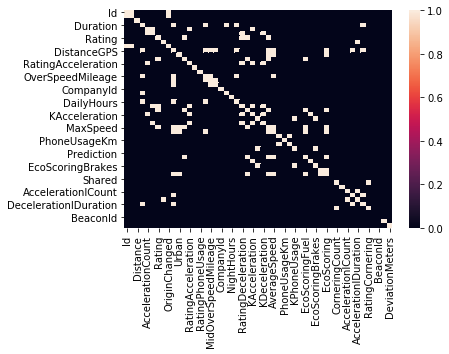

In [23]:
sns.heatmap(rich_tracks.corr().abs()>0.5);

,DeviceToken,os_version
0,2A768BE9-24E4-4274-AE30-03D07EE1D5B8,Android
1,CA447E48-E1C4-4F06-BA03-35C029C7E0F8,Android
2,EB26DDE2-8C75-439B-8FDA-AE838E15E944,iOS
3,3135D84F-1A08-4CBF-9439-D6C1BA58F4AA,iOS
4,16B59F05-9FEC-40DA-A181-C42B1AA2B517,Android


In [8]:
data_inc_points.shape

(3791240, 12)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791240 entries, 0 to 3791239
Data columns (total 12 columns):
IncomingTrackId          int64
Speed                    float64
Latitude                 float64
Longitude                float64
PointDate                object
Height                   float64
Acceleration             float64
Deceleration             float64
TickTimestamp            int64
AccelerationXOriginal    float64
AccelerationYOriginal    float64
AccelerationZOriginal    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 347.1+ MB


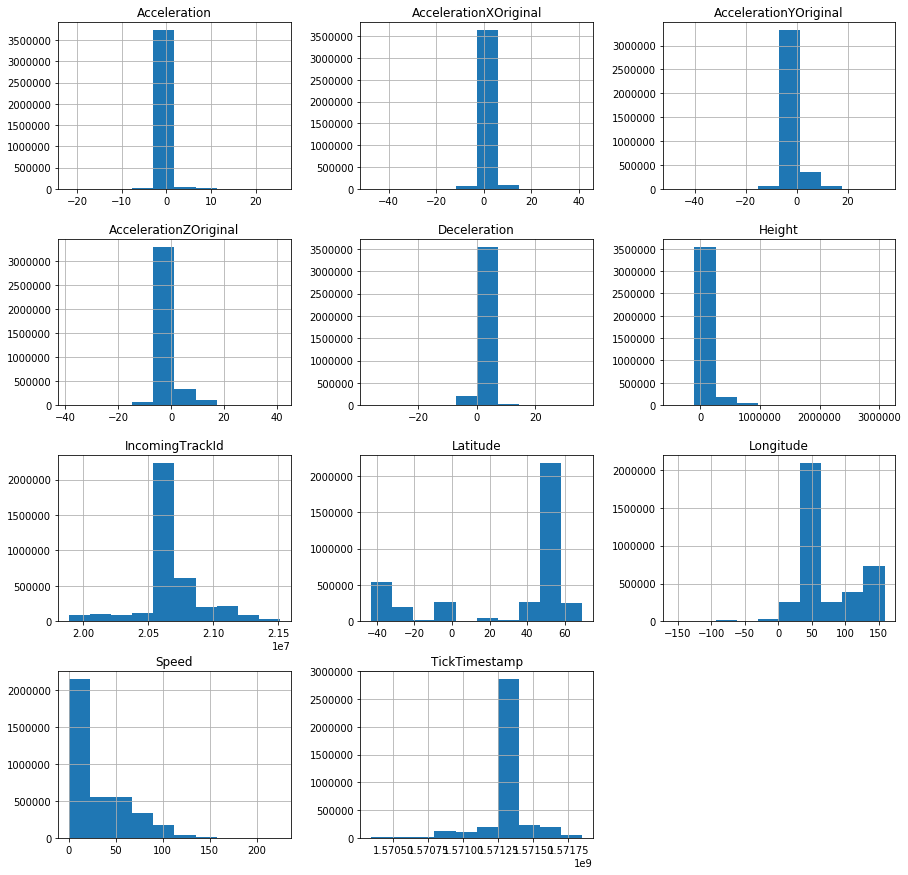

In [42]:
df.hist(figsize=(15, 15));

In [39]:
len(df['IncomingTrackId'].unique())

2587

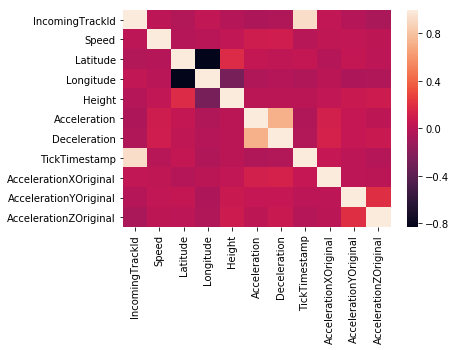

In [46]:
sns.heatmap(df.corr());

In [54]:
df.head()

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
0,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315732,0.829803,0.322861,-0.154434
1,20702795,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315733,0.716080,0.612228,-0.168091
2,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315734,0.913208,0.488998,0.308365
3,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315735,0.930328,0.396133,-0.145203
4,20702795,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315736,0.887436,0.647537,0.245926


In [55]:


df["IncomingTrackId"] = df["IncomingTrackId"] - df["IncomingTrackId"].min()

In [57]:
df.head()

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
0,814408,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315732,0.829803,0.322861,-0.154434
1,814408,0.0,55.863077,52.227935,2019-10-17 15:35:23.0000000 +03:00,98084.0,0.0,0.0,1571315733,0.716080,0.612228,-0.168091
2,814408,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315734,0.913208,0.488998,0.308365
3,814408,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315735,0.930328,0.396133,-0.145203
4,814408,0.0,55.895252,52.298750,2019-10-17 15:35:34.0000000 +03:00,80563.0,0.0,0.0,1571315736,0.887436,0.647537,0.245926


In [59]:
df["IncomingTrackId"] = df["IncomingTrackId"].astype("category")

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3791240 entries, 0 to 3791239
Data columns (total 12 columns):
IncomingTrackId          category
Speed                    float64
Latitude                 float64
Longitude                float64
PointDate                object
Height                   float64
Acceleration             float64
Deceleration             float64
TickTimestamp            int64
AccelerationXOriginal    float64
AccelerationYOriginal    float64
AccelerationZOriginal    float64
dtypes: category(1), float64(9), int64(1), object(1)
memory usage: 325.5+ MB


In [67]:
df['TickTimestamp'].max()

1571849779